<a href="https://colab.research.google.com/github/zak-era12/Student-Performance/blob/main/zak_student_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import collections
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
raw_dataset=pd.read_csv('/content/StudentsPerformance.csv')
raw_dataset

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [ ]:
raw_dataset.shape

(1000, 8)

In [ ]:
raw_dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
raw_dataset.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [ ]:
sp_df=raw_dataset
sp_df


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


**Renaming the columns**

In [ ]:
sp_df.rename(columns = {'parental level of education':'parental_education', 'test preparation course':'test_preparation',
                              'math score':'math_score','reading score':'reading_score','writing score':'writing_score',}, inplace = True)

In [ ]:
type(sp_df)

pandas.core.frame.DataFrame

In [ ]:
sp_df['total']=sp_df[['math_score', 'reading_score', 'writing_score']] .sum(axis= 1)
sp_df

,gender,race/ethnicity,parental_education,lunch,test_preparation,math_score,reading_score,writing_score,total
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282
996,male,group C,high school,free/reduced,none,62,55,55,172
997,female,group C,high school,free/reduced,completed,59,71,65,195
998,female,group D,some college,standard,completed,68,78,77,223


In [ ]:
sp_df['percent']=sp_df['total']/3
sp_df

,gender,race/ethnicity,parental_education,lunch,test_preparation,math_score,reading_score,writing_score,total,percent
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


# **Exploratory Data Analysis**

**The percentage distribution of gender across the students**

In [ ]:
sp_df.nunique()

gender                  2
race/ethnicity          5
parental_education      6
lunch                   2
test_preparation        2
math_score             81
reading_score          72
writing_score          77
total                 194
percent               194
dtype: int64

In [ ]:
sp_df.nunique(axis=0)

gender                  2
race/ethnicity          5
parental_education      6
lunch                   2
test_preparation        2
math_score             81
reading_score          72
writing_score          77
total                 194
percent               194
dtype: int64

In [ ]:
sp_df.gender.nunique()

2

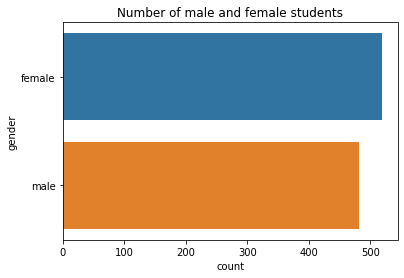

In [ ]:
sns.countplot(data=sp_df,y='gender')
plt.title('Number of male and female students')
plt.show()

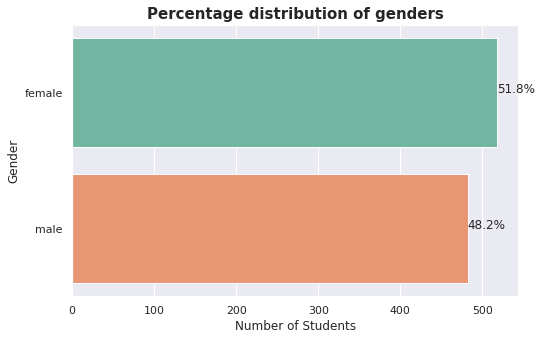

In [ ]:
plt.figure(figsize=(8,5))
sns.set(style="darkgrid", font_scale=1)
plt.tight_layout()
total = len(sp_df['gender'])
ax = sns.countplot(y="gender", data=sp_df,palette="Set2")
ax.set(ylabel='Gender', xlabel='Number of Students')
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

#sns.despine()
plt.title('Percentage distribution of genders',fontweight="bold",fontsize = 15)    
plt.show()

In [ ]:
gender=sp_df['gender'].value_counts().reset_index()
px.bar(sp_df,x=sp_df['gender'], color='gender')

In [ ]:
# Students of different ethnicities
groups = sp_df['race/ethnicity'].value_counts().reset_index().rename(columns={'index': 'groups', 'race/ethnicity': 'value_counts'})

px.bar(groups, x='groups', y='value_counts', color='value_counts', title='Number of students in groups')

**In which exam do we observe a fairly good performance?
<br>
 OR 
 <br>
 which exam has the overall best performance?**

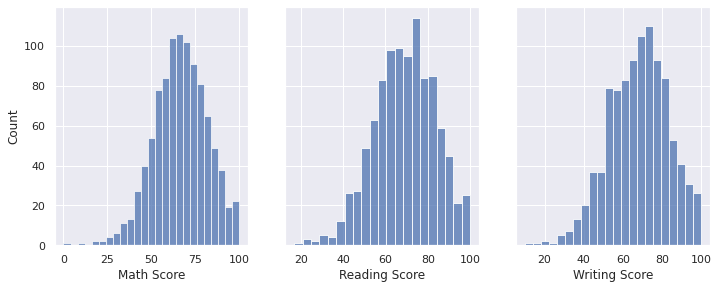

In [ ]:
sns.set(style="darkgrid", font_scale=1)
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True)
fig.set_size_inches(10, 4)
plt.tight_layout()

sns.histplot(sp_df["math_score"],ax=ax1)
ax1.set_xlabel('Math Score')

sns.histplot(sp_df["reading_score"],ax=ax2)
ax2.set_xlabel('Reading Score')

sns.histplot(sp_df["writing_score"],ax=ax3)
ax3.set_xlabel('Writing Score')
plt.show()

**Reading and Writing, go hand-in-hand: do we see any correlation in their scores?**

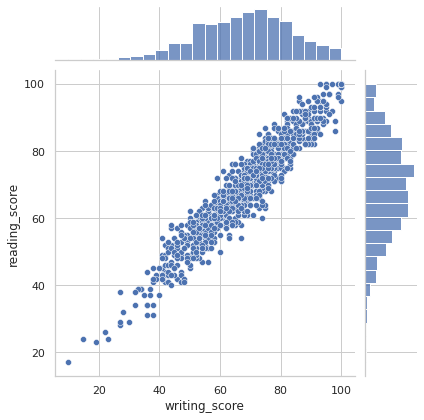

In [ ]:
sns.set_style('whitegrid')
ax = sns.jointplot(data=sp_df,x="writing_score", y="reading_score")  
plt.show()

**Gender-wise Performance**<br>
Who is in the lead - Girls or Boys?

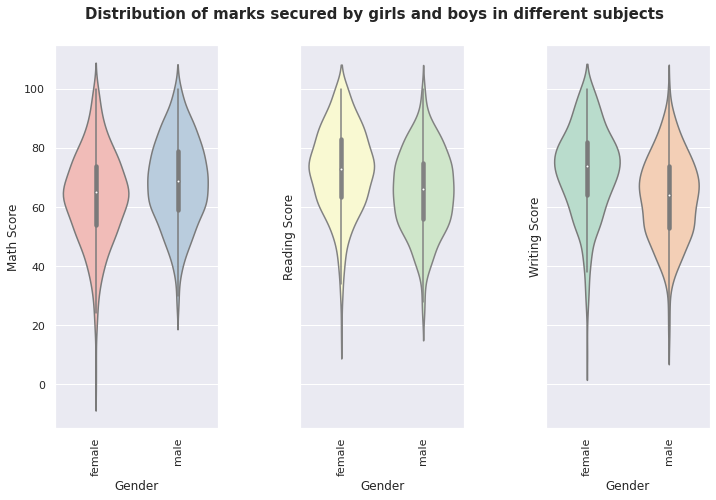

In [ ]:
sns.set(style="darkgrid", font_scale=1)
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True)
fig.set_size_inches(10, 6)

plt.tight_layout()

sns.violinplot("gender", "math_score", data=sp_df,
               palette='Pastel1', ax=ax1)
ax1.set_xlabel('Gender')
ax1.set_ylabel('Math Score')
ax1.set_xticklabels(labels = sp_df['gender'].unique(),rotation=90)

sns.violinplot("gender", "reading_score", data=sp_df,
               palette='Pastel1_r',ax=ax2)
ax2.set_xlabel('Gender')
ax2.set_ylabel('Reading Score')
ax2.set_xticklabels(labels = sp_df['gender'].unique(),rotation=90)

sns.violinplot("gender", "writing_score", data=sp_df,
               palette='Pastel2',ax=ax3)
ax3.set_xlabel('Gender')
ax3.set_ylabel('Writing Score')
ax3.set_xticklabels(labels = sp_df['gender'].unique(),rotation=90)

fig.subplots_adjust(wspace = 0.5)
plt.suptitle('Distribution of marks secured by girls and boys in different subjects',fontweight="bold",fontsize = 15,y=1.05)
plt.show()

average score of male and female in math & reading & writing.

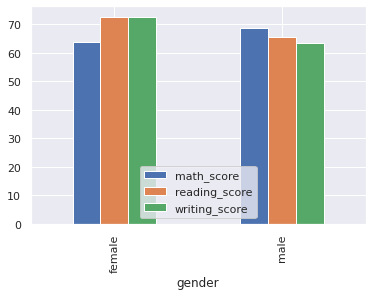

In [ ]:
sp_df.groupby(by=["gender"])["math_score","reading_score","writing_score"].mean().plot(kind="bar")
plt.show()

In [ ]:
#average score by ethnicity
average_scores_by_group = sp_df.groupby('race/ethnicity', as_index=False).agg({'math_score': np.average,
                                                                                       'reading_score': np.average,
                                                                                       'writing_score': np.average,
                                                                                       'total': np.average})

average_scores_by_group = average_scores_by_group.melt(id_vars=['race/ethnicity'],
                                                       value_vars=['math_score', 'reading_score', 'writing_score', 'total'],
                                                       var_name='score_name', value_name='average_score')

fig = px.bar(average_scores_by_group, x='race/ethnicity', y='average_score', color='score_name')
fig.update_layout(title_text='<b>Averege students scores by groups<b>', titlefont={'size': 24, 'family':'Serif'})

fig.show()

**Ethnicity based performance**<br>
Having a quick glance at the different races or ethinicities given in the data¶
There are a total of five races in which we see a majority of students belong to group C, while group A are the least with a total percentage distribution of 31.9 and 8.9 respectively

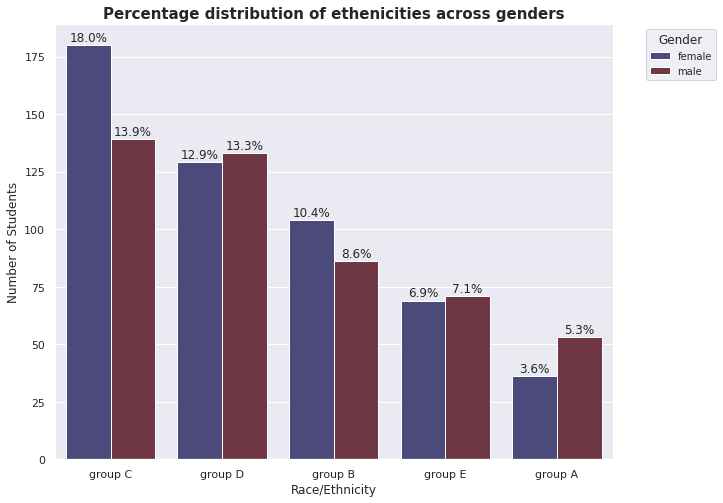

In [ ]:
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
sns.despine(offset=10, trim=True)
plt.tight_layout()
total = sp_df['race/ethnicity'].value_counts().sum()
ax = sns.countplot(x="race/ethnicity", hue='gender',data=sp_df,palette="icefire",
                  order = sp_df['race/ethnicity'].value_counts().index)
ax.set(xlabel='Race/Ethnicity', ylabel='Number of Students')
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=10,title = 'Gender')
plt.title('Percentage distribution of ethenicities across genders',fontweight="bold",fontsize = 15)    
plt.show()

# **How does parents' education level varies in the different ethenicities?t**

In [ ]:
x=sp_df["parental_education"].value_counts().reset_index()
px.pie(x,names="index",values="parental_education")

In [ ]:
pd.crosstab(sp_df["parental_education"],sp_df["race/ethnicity"])

race/ethnicity,group A,group B,group C,group D,group E
parental_education,,,,,
associate's degree,14,41,78,50,39
bachelor's degree,12,20,40,28,18
high school,18,48,64,44,22
master's degree,3,6,19,23,8
some college,18,37,69,67,35
some high school,24,38,49,50,18


OR

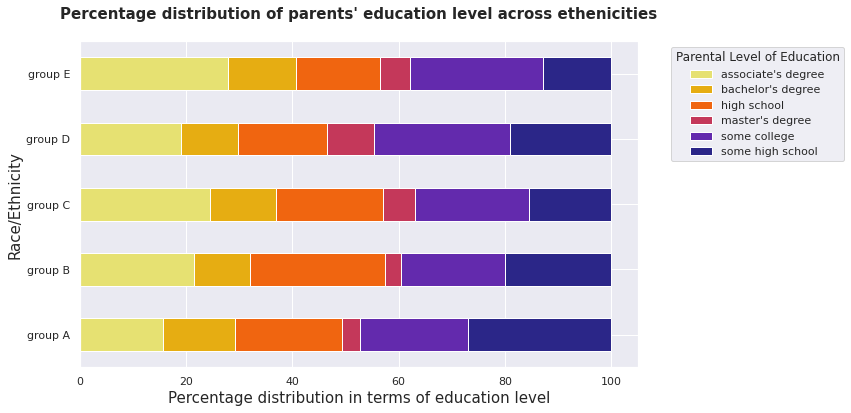

In [ ]:
sns.set_palette("CMRmap_r")
raceToEduLeveldf = sp_df.groupby(['race/ethnicity','parental_education']).size().unstack().apply(lambda r: r/r.sum()*100, axis=1)
ax = raceToEduLeveldf.plot(kind='barh', stacked=True, figsize=(10, 6))
ax.set_ylabel('Race/Ethnicity',fontsize=15)
ax.set_xlabel('Percentage distribution in terms of education level',fontsize=15)
plt.legend(title='Parental Level of Education', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Percentage distribution of parents' education level across ethenicities",fontweight="bold",fontsize = 15,y=1.05)
plt.show()

**Does parents' education level have a significant influence on their children's performance?**<br>
There seems to be no major effect in terms of parents' level of education on the average score across the subjects evaluated

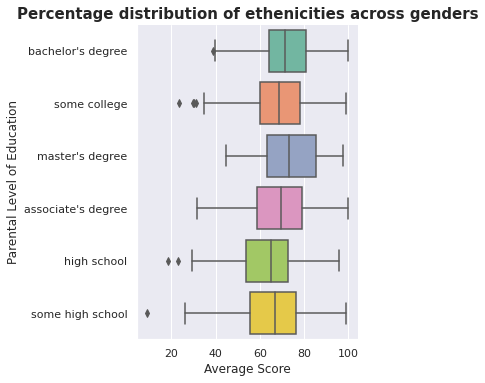

In [ ]:
sns.set_style('darkgrid')
ax = sns.catplot(y='parental_education',x='percent', data=sp_df,
                kind='box', orient='h', palette='Set2')
ax.set(xlabel='Average Score', ylabel='Parental Level of Education')
plt.title('Percentage distribution of ethenicities across genders',fontweight="bold",fontsize = 15,y=1.05)    
plt.show()

**Let's look at how lunch affects the average score of the students**<br>

As it's rightly said: You gotta nourish to flourish.
We do see that students to have access to standard lunch have a remarkably better average as compared to the ones who come under the free/reduced category

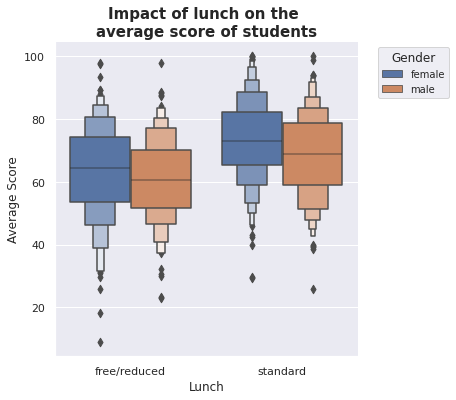

In [ ]:
sns.set(style="darkgrid", font_scale=1)
ax1 = sns.catplot(x="lunch", y="percent", hue="gender", kind="boxen", data=sp_df.sort_values('lunch'),legend=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=10,title = 'Gender')
ax1.set(xlabel='Lunch', ylabel='Average Score')
plt.title('Impact of lunch on the \naverage score of students',fontweight="bold",fontsize = 15)    
plt.show()

**OR**

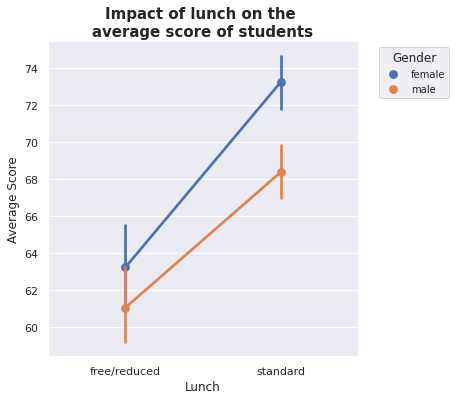

In [ ]:
sns.set(style="darkgrid", font_scale=1)
ax1 = sns.catplot(x="lunch", y="percent", hue="gender", kind="point", data=sp_df.sort_values('lunch'),legend=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=10,title = 'Gender')
ax1.set(xlabel='Lunch', ylabel='Average Score')
plt.title('Impact of lunch on the \naverage score of students',fontweight="bold",fontsize = 15)    
plt.show()

In [ ]:
test=sp_df["test_preparation"].value_counts().reset_index()
px.pie(test,names="index",values="test_preparation",title="%AGE OF TEST PREPRATION COURSE")

which race/ethnicity have have completed the most test preparation course

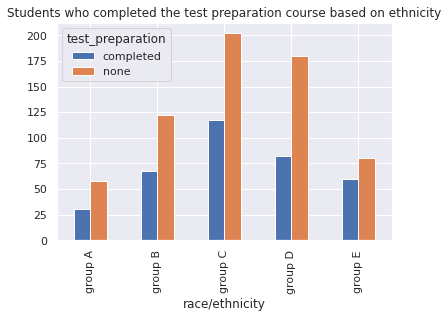

In [ ]:
import plotly.graph_objects as go
pd.crosstab(sp_df["race/ethnicity"],sp_df["test_preparation"]).plot(kind="bar")
plt.title('Students who completed the test preparation course based on ethnicity')
plt.show()

In [ ]:
group_test_data = sp_df[['race/ethnicity', 'test_preparation']]
group_test_data['test_preparation'] = group_test_data['test_preparation']

students_test_info = group_test_data.groupby(['race/ethnicity', 'test_preparation'], as_index=False).agg({'test_preparation': len})
students_test_info.columns = ['group', 'test_preparation', 'value_counts']

fig = px.pie(students_test_info,
       names='group',
       values='value_counts',
       color='group',
       title='How many persons are completed a test in each group?')

fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



ValueError: ignored

**Do we see the Test Preparation Course helping the students score well?**<br>
Practice makes perfect
Students who completed the course scored a better aggregate than the ones who didn't

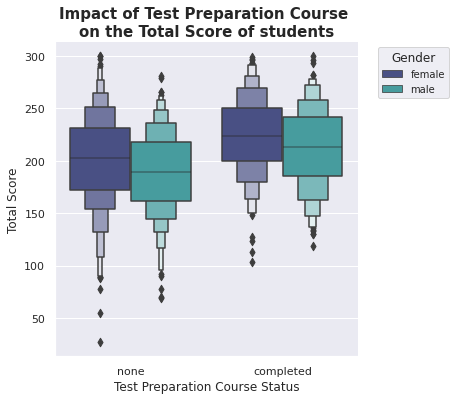

In [ ]:
sns.set(style="darkgrid", font_scale=1)
ax1 = sns.catplot(x="test_preparation", y="total", hue="gender", kind="boxen", data=sp_df.sort_values('test_preparation',ascending=False),legend=False, palette='mako')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=10,title = 'Gender')
ax1.set(xlabel='Test Preparation Course Status', ylabel='Total Score')
plt.title('Impact of Test Preparation Course \non the Total Score of students',fontweight="bold",fontsize = 15)    
plt.show()

Do we observe a collective impact on the total score based on the access to lunch and status of test preparation course?
Food for thought?
We can see that the total score is higher for the ones who have completed the Test Preparation Course, and within the aspect of lunch - we observe the ones who had access to standard lunch scored higher than the ones who didn't.

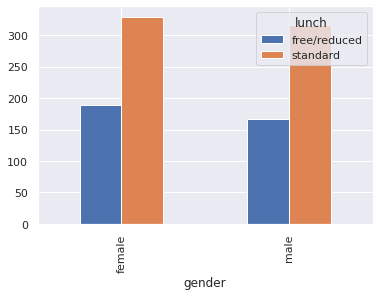

In [ ]:
#how many male and female got which type of lunch
pd.crosstab(sp_df["gender"],sp_df["lunch"]).plot(kind="bar")
plt.show()

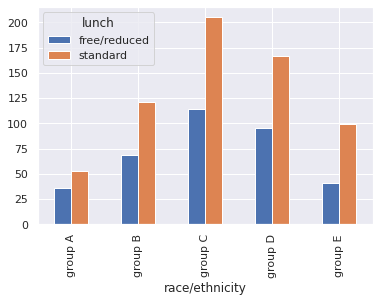

In [ ]:
#What type of lunch each race got? 
pd.crosstab(sp_df["race/ethnicity"],sp_df["lunch"]).plot(kind="bar")
plt.show()

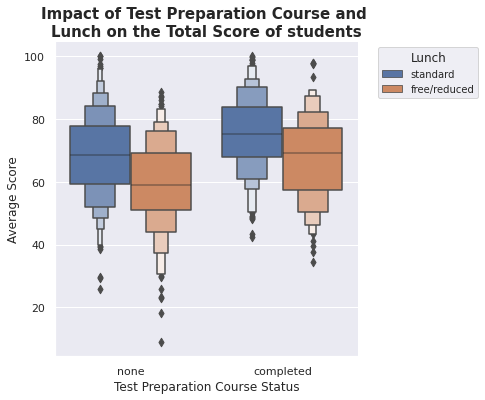

In [ ]:
ax = sns.catplot(x="test_preparation", y="percent", hue = "lunch", kind="boxen", data=sp_df.sort_values('test_preparation',ascending=False),legend=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=10,title = 'Lunch')
ax.set(xlabel='Test Preparation Course Status', ylabel='Average Score')
plt.title('Impact of Test Preparation Course and \nLunch on the Total Score of students',fontweight="bold",fontsize = 15,y=1.05)    
plt.show()

do students with higher parental level of education perform better?
        

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

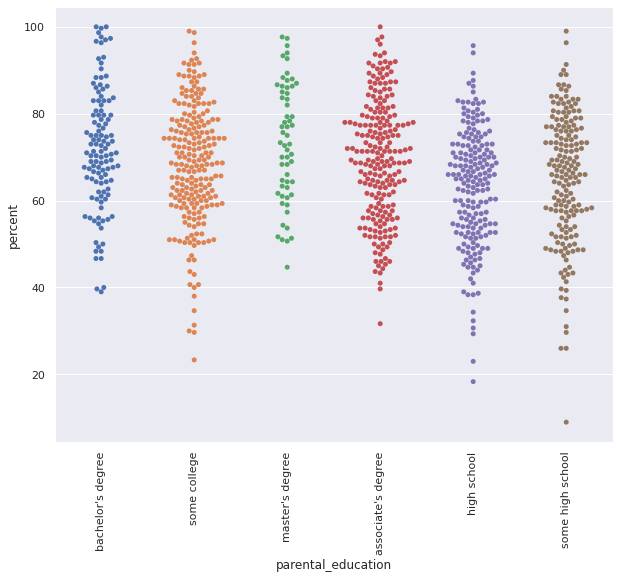

In [ ]:
plt.figure(figsize=(10,8))
sns.swarmplot(x='parental_education',y='percent',data=sp_df)
plt.xticks(rotation=90)

In [ ]:
sp_df

,gender,race/ethnicity,parental_education,lunch,test_preparation,math_score,reading_score,writing_score,total,percent
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


In [ ]:
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
sns.despine(offset=10, trim=True)
plt.tight_layout()
total = sp_df['parental_education'].value_counts().sum()
ax = sns.countplot(x="parental_education",hue='gender',data=sp_df,palette="Set2",
                  order = sp_df['parental_education'].value_counts().index)
ax.set(xlabel='parental level of education', ylabel='percent')
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=10,title = 'Gender')
plt.title('Percentage distribution of parental level of education across genders',fontweight="bold",fontsize = 15)    
plt.show()


ValueError: ignored

<Figure size 720x576 with 0 Axes>